In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import numpy as np
x=pd.read_csv("/gdrive/MyDrive/TrainningWithout2020.xlsx")
y=pd.read_csv("/gdrive/MyDrive/TrainningWithout2020.xlsx")

y1=list(x["YEAR"])
x1=list(x["Jun-Sep"])
z1=list(x["JUN"])
w1=list(x["MAY"])

plt.plot(y1, x1,'o')
plt.show()

UnicodeDecodeError: ignored

    SUBDIVISION  YEAR   JAN   FEB  ...  Oct-Dec  flood     avgjune    sub
0        KERALA  1901  28.7  44.7  ...    666.1      0  274.866667  649.9
1        KERALA  1902   6.7   2.6  ...    638.2      1  130.300000  256.4
2        KERALA  1903   3.2  18.6  ...    570.1      0  186.200000  308.9
3        KERALA  1904  23.7   3.0  ...    365.3      0  366.066667  862.5
4        KERALA  1905   1.2  22.3  ...    458.1      0  283.400000  586.9
..          ...   ...   ...   ...  ...      ...    ...         ...    ...
110      KERALA  2011  20.5  45.7  ...    446.3      0  262.833333  664.3
111      KERALA  2012   7.4  11.0  ...    309.8      0  143.433333  335.0
112      KERALA  2013   3.9  40.1  ...    431.8      1  347.566667  923.4
113      KERALA  2014   4.6  10.3  ...    502.1      0  151.466667  203.4
114      KERALA  2015   3.1   5.8  ...    611.1      0  187.866667  361.8

[115 rows x 22 columns]


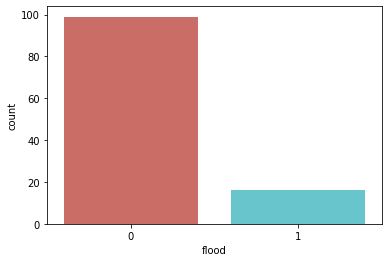

In [ ]:
flood=[]
june=[]
sub=[]

#CREATING A NEW COLOUMN WITH BINARY CLASSIFICATION DEPENDING IF THAT YEAR HAD FLOODED OR NOT, USING RAINFALL OF THAT YEAR AS THRESHOLD
#print(x1[114])
for i in range(0,len(x1)):
    if x1[i]>2400:
        flood.append('1')
    else:
        flood.append('0')

#print(len(x1))

#APPROAXIMATELY FINDING THE RAINFALL DATA FOR 10 DAYS FOR THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    june.append(z1[k]/3)

#FINDING THE INCREASE IN RAINFALL FROM THE MONTH OF MAY TO THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    sub.append(abs(w1[k]-z1[k]))

#print(len(flood),len(x1))
df = pd.DataFrame({'flood':flood})
df1=pd.DataFrame({'per_10_days':june})

x["flood"]=flood
x["avgjune"]=june
x["sub"]=sub

#SAVING THE NEW CSV FILE WITH THE NEW COLOUMNS
x.to_csv("/content/drive/MyDrive/out1.csv")
print((x))
x['flood'].value_counts(dropna=False)
sns.countplot(x='flood', data=x, palette='hls')


In [ ]:
!pip install scikit-learn
!pip install numpy
import numpy as np
import scipy 
from scipy.stats import spearmanr

from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [ ]:
#TAKING THE COLOUMNS WHICH ARE TO USED FOR TRAINING THE MODEL
#16 MAR-MAY
#20- AVG OF 10 DAYS JUNE 
#21- DIFFERENCE OF RAINFALL FROM MAY TO JUNE
#19 - BINARY CLASS OF FLOOD- 0 OR 1
#MORE DATA CAN BE ADDED FOR TRAINING, BY JUST ADDING MORE NUMBER OF COLOUMNS FROM THE CSV FILE

#WE USE LOGISTIC REGRESSION FOR TRAINING

X = x.iloc[:,[16,20,21]].values
y1=x.iloc[:,19].values

(X_train, X_test, Y_train, Y_test) = train_test_split(X, y1, test_size=0.33, random_state=42)


print(X_train.shape)
print(X_test.shape)


#Logistic Regression

Lr=LogisticRegression()
Lr.fit(X_train,Y_train)

#X1= scale(X)
#print(X1)




(77, 3)
(38, 3)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#K-Nearest Neighbour
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
#Support Vector Classification
clf = svm.SVC(kernel='rbf')
clf.kernel
clf.fit(X_train, Y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# PRINTS THE ACCURACY
print('Logestic Regression Accuracy:',Lr.score(X_test,Y_test))  
print('K-Nearest Neighbour Accuracy:',knn.score(X_test,Y_test))  
print('Support Vector Machine Accuracy:',clf.score(X_test,Y_test))  

Logestic Regression Accuracy: 0.8157894736842105
K-Nearest Neighbour Accuracy: 0.8157894736842105
Support Vector Machine Accuracy: 0.8157894736842105


Logestic Regression Accuracy: 0.8157894736842105
K-Nearest Neighbour Accuracy: 0.8157894736842105
Support Vector Machine Accuracy: 0.8157894736842105
[[98  1]
 [13  3]]


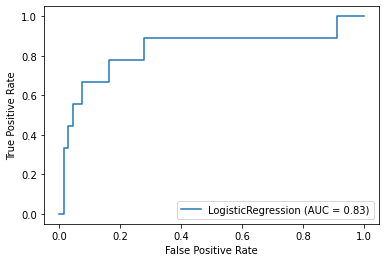

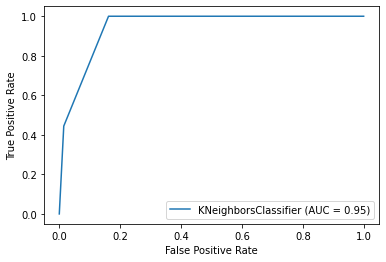

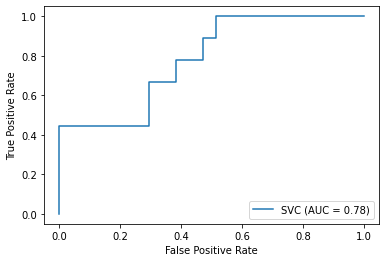

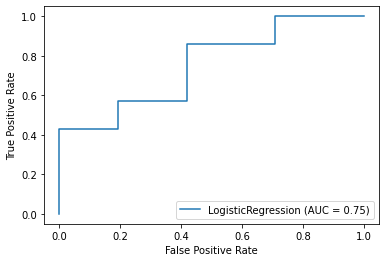

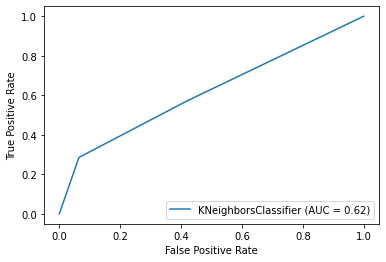

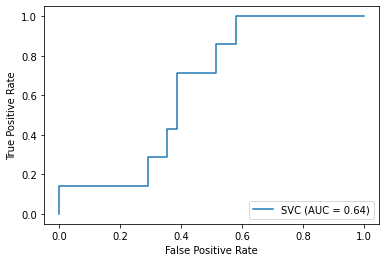

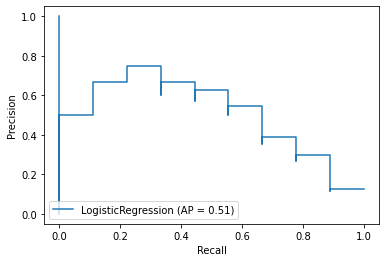

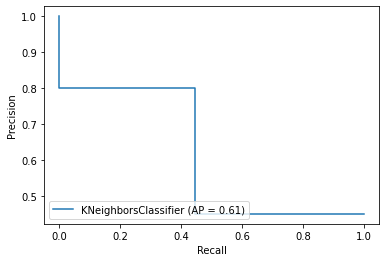

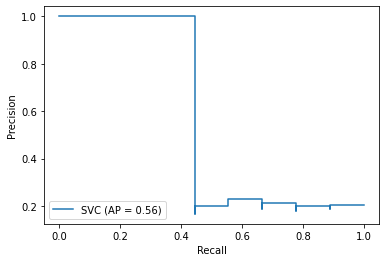

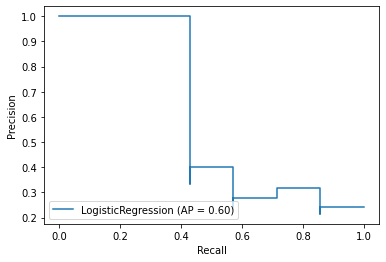

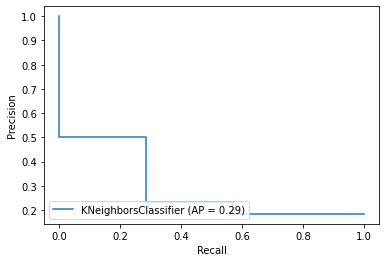

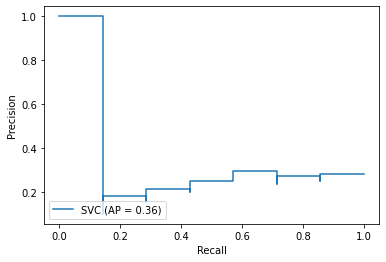

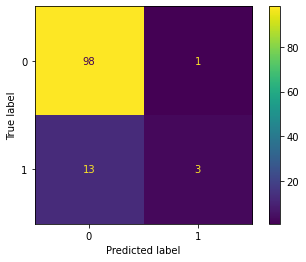

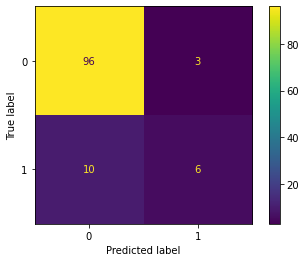

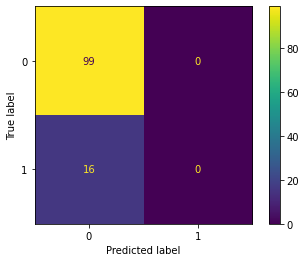

In [ ]:
y_pred=Lr.predict(X)

#Evaluate the model using confusion matrix
confusion_matrix= confusion_matrix(y1, y_pred)
print(confusion_matrix)


#Roc Curve for training data
plot_roc_curve(Lr, X_train, Y_train)
plot_roc_curve(knn, X_train, Y_train)
plot_roc_curve(clf, X_train, Y_train)

#Roc curve for testing data
plot_roc_curve(Lr, X_test, Y_test)
plot_roc_curve(knn, X_test, Y_test)
plot_roc_curve(clf, X_test, Y_test)

#Precision curve for training data
plot_precision_recall_curve(Lr, X_train, Y_train)
plot_precision_recall_curve(knn, X_train, Y_train)
plot_precision_recall_curve(clf, X_train, Y_train)

#Pre4cision curve for test data
plot_precision_recall_curve(Lr, X_test, Y_test)
plot_precision_recall_curve(knn, X_test, Y_test)
plot_precision_recall_curve(clf, X_test, Y_test)

#Confusion Matrix Plot
plot_confusion_matrix(Lr, X, y1)
plot_confusion_matrix(knn, X, y1)
plot_confusion_matrix(clf, X, y1)


#print(clf.score(X,y1))

#ypred=Lr.score(X_test,Y_test)
#print(ypred)

#clf1 = RandomForestClassifier(n_estimators=50)
#clf1 = clf1.fit(X, y1)
#print(clf1.score(X,y1))

In [ ]:

q1=275 # present years march to may rainfall data on average
w1=130 #average rainfall in past 10 days of june
e1=260 #average inscrease in rainfall from may to june 

q2=20 # present years march to may rainfall data on average
w2=800 #average rainfall in past 10 days of june
e2=300 #average inscrease in rainfall from may to june 

l=[[q1,w1,e1],[q2,w2,e2],[50,3000,205]]

#ypred=Lr.predict(X)
f1=Lr.predict(l)
print('Logistic regression:')

for i in range(len(f1)):

    if (int(f1[i])==1):
        print(f1[i],"- possibility of  severe flood")
    else:
        print(f1[i],"- no chance of severe flood")
        

Logistic regression:
0 - no chance of severe flood
1 - possibility of  severe flood
1 - possibility of  severe flood


In [ ]:
f2=knn.predict(l)
print('K-Nearest Neighbour:')

for i in range(len(f2)):

    if (int(f2[i])==1):
        print(f2[i],"- possibility of  severe flood")
    else:
        print(f2[i],"- no chance of severe flood")


f3=clf.predict(l)
print('SVM:')
for i in range(len(f3)):

    if (int(f3[i])==1):
        print(f3[i],"- possibility of  severe flood")
    else:
        print(f3[i],"- no chance of severe flood")